#### Use predict_chemprop.sh to generate pred_file.

#### Repeat 3

In [1]:
import pandas as pd
import numpy as np
import re

pred_file = "../../results/predictions/merged_predictions_repeat_3.csv"
preds_df = pd.read_csv(pred_file)

def parse_prediction(value):
    if not isinstance(value, str): 
        return np.nan  

    value = re.sub(r"[\[\]]", "", value) 
    value = re.sub(r",+", ",", value) 
    value = re.sub(r"\s+", " ", value) 
    try:
        values = np.array([float(x) for x in value.split()])  
        return values
    except ValueError:
        return np.nan  

preds_df["parsed_labels"] = preds_df["labels"].apply(parse_prediction)

parsed_probs_df = pd.DataFrame(preds_df["parsed_labels"].tolist(), columns=["pred_0", "pred_1", "pred_2"])

final_preds_df = pd.concat([preds_df["SMILES"], parsed_probs_df], axis=1)

merged_df=final_preds_df
merged_df

,SMILES,pred_0,pred_1,pred_2
0,N1c(nc(c(cc2C)n3)cc2C)c3C(O)=NC1=O,0.015508,9.822981e-01,2.193840e-03
1,C1([C@]([C@]2([H])[C@@](O)(C[C@H]1O)[C@]([H])(...,1.000000,1.251385e-30,1.155137e-37
2,C1(C)=C(O)[C@H](C\C(\C)=C/CC[C@H](C)\C=C\C=C(\...,1.000000,5.257142e-12,7.326545e-16
3,C(OS([O-])(=O)=O)CNC(=O)[C@@]1([H])CC[C@]([H])...,1.000000,4.559367e-18,1.399643e-20
4,[C@@]1([C@](C)(C(=O)O)[C@@]([H])(C(C)=C[C@H]2C...,0.999995,4.027726e-06,5.507561e-07
...,...,...,...,...
27361,[C@@]12([C@]3(O1)[C@@H](OC2=O)[C@H](O4)[C@@]4(...,1.000000,1.351629e-17,4.774273e-19
27362,O([C@H](OC[C@H]1O)[C@H](O)[C@H]1OC)[C@H]2[C@H]...,1.000000,0.000000e+00,0.000000e+00
27363,OC[C@H](NC(=O)[C@H](O)CCCCCCCCCCCCCCCC)[C@H](O...,1.000000,1.355743e-19,9.199034e-20
27364,N1[C@@H](CC[S@@+]([O-])C)C(N[C@@H](Cc2ccccc2)C...,0.963629,3.295750e-03,3.307501e-02


In [2]:

avg_preds = merged_df.groupby("SMILES")[["pred_0", "pred_1", "pred_2"]].mean().reset_index()

avg_preds


,SMILES,pred_0,pred_1,pred_2
0,Br[C@H]1C(C)(O[C@@]([C@]2([H])CC=C(C)CC2)(C)[C...,0.487178,3.390408e-01,1.737809e-01
1,Br[C@H]1C(O[C@@]([C@@H]2O[C@H](CC[C@H]([C@]3(O...,1.000000,2.546444e-11,4.776998e-14
2,Br\C=C\C#CCCCC[C@@H]1O[C@H]1C#CC#CCCCC(=O)OC,1.000000,1.125124e-18,1.736018e-25
3,Br\C=C\C#CCCCC[C@H](O)[C@@H](Br)C#CC#CCCCC(=O)OC,1.000000,1.401298e-45,1.812196e-38
4,Br\C=C\C#CCCCC[C@H](O)[C@H](Br)C#CC#CCCCC(=O)OC,1.000000,1.499216e-16,6.953128e-22
...,...,...,...,...
11312,o1c(nc(ccc(c2)O)c23)c3c4c(c(c(cc5)[nH]c6)c6C[C...,0.999921,6.806990e-05,1.103173e-05
11313,o1cc(c(C[C@@]2([C@@](C)([C@H](C\C=C(\C)/C3)OC(...,0.999644,7.519747e-05,2.805649e-04
11314,s1c(c(c(ncc2)c(c2c3c(cccc3)N4)c45)nc1)c5CCNC(=...,1.000000,1.959998e-10,1.116849e-11
11315,s1c(c(ssc(c(c(c(OC)c2OC)SC)CCN(C)C)c12)c(OC)c(...,1.000000,1.485466e-14,8.388099e-16


In [4]:

avg_preds["pred_label"] = avg_preds[["pred_0", "pred_1", "pred_2"]].idxmax(axis=1).str.extract(r"(\d)").astype(int)

true_data = pd.read_csv("../../data/processed/data_cmnpd_after2000.csv")

merged = pd.merge(avg_preds, true_data[["SMILES", "labels"]], on="SMILES", how="inner")
merged["mismatch"] = merged["pred_label"] != merged["labels"]
wrong=merged[merged['mismatch']==True]
wrong

,SMILES,pred_0,pred_1,pred_2,pred_label,labels,mismatch
131,C(/C(=O)OC1CC(CCCCCCCCCCCCCCCC)=O)(\C1=O)=C(\N...,0.491335,0.008641,0.500024,2,0,True
141,C(/C(CC[C@@H](OC(C)=O)C(CC1)=C)=O)=C\[C@H]1C(C)C,0.336785,0.090962,0.572253,2,0,True
152,C(/C(OCC=C1)C1=C2O)(\C2=O)=C\CCO,0.000001,0.000011,0.999988,2,0,True
165,C(/C)(=C/CCCCCCCC)\[C@@H](CCCCC(O)=O)C,0.291470,0.707389,0.001141,1,0,True
179,C(/C)(\C=C(/C)\C1=C(C)C(OC)=C(C)C(=O)O1)=C\C,0.000005,0.999993,0.000002,1,0,True
...,...,...,...,...,...,...,...
11271,n1c([nH]cn2)c2c(NC(=O)[C@H](C)CC)nc1,0.074371,0.925403,0.000226,1,0,True
11273,n1c(c(C(O)=NC2=O)n([C@@H](C[C@@H]3O)O[C@@H]3CO...,0.152043,0.613230,0.234727,1,0,True
11291,n1c(cccc2)c2c(C[C@@H](N(C)C(=O)C(C)NC(=O)[C@@H...,0.499852,0.500052,0.000095,1,0,True
11292,n1c(cn(Cc2ccc(cc2)OC)c1N)Cc(cc3)cc(OC)c3OC,0.006177,0.048610,0.945213,2,0,True


In [5]:
wrong_df=avg_preds[avg_preds['pred_0']<0.9]
wrong_df

,SMILES,pred_0,pred_1,pred_2,pred_label
0,Br[C@H]1C(C)(O[C@@]([C@]2([H])CC=C(C)CC2)(C)[C...,0.487178,0.339041,1.737809e-01,0
83,C(/Br)=C(\OC)/C(=C)CC(OC(CCCCCCCCC\C=C\C(\Cl)=...,0.666667,0.333333,7.931746e-14,0
97,C(/C(/C)=C/[C@@H](C)C[C@@H](C)CCC)=C(/C(=C(C)C...,0.500236,0.000034,4.997303e-01,0
124,C(/C(=O)C1)(\[C@]2([H])[C@]1(C)C\C=C(/C)\CC[C@...,0.892326,0.016252,9.142241e-02,0
128,C(/C(=O)NC(C(C)C)C(=O)N[C@@H](C(C)O)C(=O)NC(C(...,0.666103,0.333790,1.069560e-04,0
...,...,...,...,...,...
11291,n1c(cccc2)c2c(C[C@@H](N(C)C(=O)C(C)NC(=O)[C@@H...,0.499852,0.500052,9.536394e-05,1
11292,n1c(cn(Cc2ccc(cc2)OC)c1N)Cc(cc3)cc(OC)c3OC,0.006177,0.048610,9.452133e-01,2
11301,n1c2c(c(ccn3)C=C(OC)C2=O)c3c(NC)c1,0.667448,0.332472,8.032549e-05,0
11309,n1cc(cnc1)c2c[nH]c(cc3)c2cc3O,0.790564,0.194373,1.506293e-02,0


In [6]:
wrong_df=avg_preds[avg_preds['pred_0']<0.7]
wrong_df

,SMILES,pred_0,pred_1,pred_2,pred_label
0,Br[C@H]1C(C)(O[C@@]([C@]2([H])CC=C(C)CC2)(C)[C...,0.487178,0.339041,1.737809e-01,0
83,C(/Br)=C(\OC)/C(=C)CC(OC(CCCCCCCCC\C=C\C(\Cl)=...,0.666667,0.333333,7.931746e-14,0
97,C(/C(/C)=C/[C@@H](C)C[C@@H](C)CCC)=C(/C(=C(C)C...,0.500236,0.000034,4.997303e-01,0
128,C(/C(=O)NC(C(C)C)C(=O)N[C@@H](C(C)O)C(=O)NC(C(...,0.666103,0.333790,1.069560e-04,0
131,C(/C(=O)OC1CC(CCCCCCCCCCCCCCCC)=O)(\C1=O)=C(\N...,0.491335,0.008641,5.000241e-01,2
...,...,...,...,...,...
11285,n1c(c2c(c(Nc(cccc3)c34)c5CCNC(C(C)CC)=O)c4ccn2...,0.666667,0.333333,8.138260e-12,0
11291,n1c(cccc2)c2c(C[C@@H](N(C)C(=O)C(C)NC(=O)[C@@H...,0.499852,0.500052,9.536394e-05,1
11292,n1c(cn(Cc2ccc(cc2)OC)c1N)Cc(cc3)cc(OC)c3OC,0.006177,0.048610,9.452133e-01,2
11301,n1c2c(c(ccn3)C=C(OC)C2=O)c3c(NC)c1,0.667448,0.332472,8.032549e-05,0


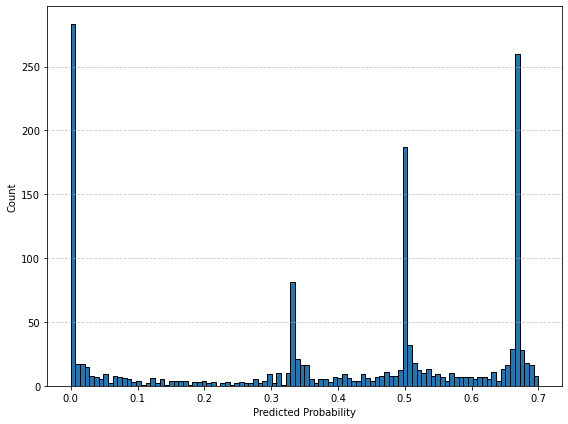

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(wrong_df['pred_0'], bins=100, edgecolor='black') 
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Repeat 5

In [16]:
import pandas as pd
import numpy as np
import re

pred_file =  "../../results/predictions/merged_predictions_repeat_5.csv"
preds_df = pd.read_csv(pred_file)

def parse_prediction(value):
    if not isinstance(value, str): 
        return np.nan  

    value = re.sub(r"[\[\]]", "", value) 
    value = re.sub(r",+", ",", value) 
    value = re.sub(r"\s+", " ", value) 
    try:
        values = np.array([float(x) for x in value.split()])  
        return values
    except ValueError:
        return np.nan  

preds_df["parsed_labels"] = preds_df["labels"].apply(parse_prediction)

parsed_probs_df = pd.DataFrame(preds_df["parsed_labels"].tolist(), columns=["pred_0", "pred_1", "pred_2"])

final_preds_df = pd.concat([preds_df["SMILES"], parsed_probs_df], axis=1)

merged_df=final_preds_df
merged_df

,SMILES,pred_0,pred_1,pred_2
0,N1c(nc(c(cc2C)n3)cc2C)c3C(O)=NC1=O,8.525875e-09,1.000000e+00,2.422109e-10
1,C1([C@]([C@]2([H])[C@@](O)(C[C@H]1O)[C@]([H])(...,1.000000e+00,5.259908e-24,8.939986e-20
2,C1(C)=C(O)[C@H](C\C(\C)=C/CC[C@H](C)\C=C\C=C(\...,1.000000e+00,4.263042e-20,1.303209e-18
3,C(OS([O-])(=O)=O)CNC(=O)[C@@]1([H])CC[C@]([H])...,1.000000e+00,9.547827e-22,1.641289e-18
4,[C@@]1([C@](C)(C(=O)O)[C@@]([H])(C(C)=C[C@H]2C...,1.000000e+00,1.963191e-09,5.536593e-09
...,...,...,...,...
45605,O1[C@@](C)(C\C(=C\C=C\Cc2ccccc2)\C)C[C@@H](C)[...,1.000000e+00,2.499309e-18,6.262797e-19
45606,N1(C)c(cc2c(c(OC)c(OC)c(OC)c2)c3c(ccc(OC)c4)c4...,5.045956e-04,3.880416e-08,9.994954e-01
45607,C1CC[C@@](C2[C@@](C)(CC3)[C@H](CC4=CC(C=C(C4=O...,1.000000e+00,3.641523e-12,8.907763e-13
45608,c1cc(ccc1)C[C@@H]2NC([C@@H](NC(=O)[C@@H](CCCCN...,9.906907e-01,9.258948e-03,5.035882e-05


In [17]:

avg_preds = merged_df.groupby("SMILES")[["pred_0", "pred_1", "pred_2"]].mean().reset_index()

avg_preds


,SMILES,pred_0,pred_1,pred_2
0,Br[C@H]1C(C)(O[C@@]([C@]2([H])CC=C(C)CC2)(C)[C...,0.933772,5.306066e-02,1.316764e-02
1,Br[C@H]1C(O[C@@]([C@@H]2O[C@H](CC[C@H]([C@]3(O...,1.000000,9.788391e-13,3.011906e-11
2,Br\C=C\C#CCCCC[C@@H]1O[C@H]1C#CC#CCCCC(=O)OC,1.000000,4.188558e-13,3.044590e-14
3,Br\C=C\C#CCCCC[C@H](O)[C@@H](Br)C#CC#CCCCC(=O)OC,1.000000,8.027966e-11,7.583255e-13
4,Br\C=C\C#CCCCC[C@H](O)[C@H](Br)C#CC#CCCCC(=O)OC,1.000000,1.002563e-10,1.168123e-12
...,...,...,...,...
11393,o1c(nc(ccc(c2)O)c23)c3c4c(c(c(cc5)[nH]c6)c6C[C...,0.999999,1.115407e-08,9.324973e-07
11394,o1cc(c(C[C@@]2([C@@](C)([C@H](C\C=C(\C)/C3)OC(...,0.919777,2.149556e-02,5.872781e-02
11395,s1c(c(c(ncc2)c(c2c3c(cccc3)N4)c45)nc1)c5CCNC(=...,1.000000,1.865852e-12,5.834783e-14
11396,s1c(c(ssc(c(c(c(OC)c2OC)SC)CCN(C)C)c12)c(OC)c(...,1.000000,1.117886e-42,3.722850e-35


In [19]:

avg_preds["pred_label"] = avg_preds[["pred_0", "pred_1", "pred_2"]].idxmax(axis=1).str.extract(r"(\d)").astype(int)

true_data = pd.read_csv("../../data/processed/data_cmnpd_after2000.csv")
merged = pd.merge(avg_preds, true_data[["SMILES", "labels"]], on="SMILES", how="inner")
merged["mismatch"] = merged["pred_label"] != merged["labels"]
wrong=merged[merged['mismatch']==True]
wrong

,SMILES,pred_0,pred_1,pred_2,pred_label,labels,mismatch
84,C(/Br)=C(\OC)/C(=C)CC(OC(CCCCCCCCCCC\C(\Cl)=C/...,0.496262,0.503738,1.054340e-07,1,0,True
85,C(/Br)=C(\OC)/C(=C)CC(OC(CCCCCCCCC\C=C\C(\Cl)=...,0.325266,0.674723,1.167924e-05,1,0,True
91,C(/C#C\C=C\C#CCCCC(=O)O)=C\CC,0.333370,0.666624,6.099189e-06,1,0,True
129,C(/C(=O)C[C@@H]1C)(\C=C2[C@@]1([H])CC[C@@H]2C)...,0.331070,0.002128,6.668023e-01,2,0,True
135,C(/C(=O)[C@@](C)(CCC[C@@H]1C)[C@]1(C)C2)(\C2)=...,0.400338,0.017748,5.819146e-01,2,0,True
...,...,...,...,...,...,...,...
11279,c1n([C@H](O[C@@H]2CO)[C@H](O)[C@@H]2O)ncn1,0.105563,0.391532,5.029052e-01,2,0,True
11292,c1oc(C[C@@H](C)CC\C=C(/C)\C=C)cc1C(OCC)=O,0.042626,0.929012,2.836180e-02,1,0,True
11293,c1sc(C(C)N(C(C(C[C@H](C)C(Cl)(Cl)Cl)NC(=O)C[C@...,0.249062,0.750937,5.153077e-07,1,0,True
11294,c1sc(nc1)[C@H](N(C)C(=O)[C@H](C[C@@H](C(Cl)(Cl...,0.249176,0.750824,1.476477e-12,1,0,True


In [20]:
wrong_df=avg_preds[avg_preds['pred_0']<0.9]
wrong_df

,SMILES,pred_0,pred_1,pred_2,pred_label
64,C(#CC#CCCCCCC(OC(=O)C)CC)\C=C\C=C/Cl,0.500328,0.499606,6.567289e-05,0
72,C(#CC#C\C=C/CCCC[C@@H](OC(=O)C)C)\C=C\C=C/Cl,0.522265,0.257489,2.202456e-01,0
84,C(/Br)=C(\OC)/C(=C)CC(OC(CCCCCCCCCCC\C(\Cl)=C/...,0.496262,0.503738,1.054340e-07,1
85,C(/Br)=C(\OC)/C(=C)CC(OC(CCCCCCCCC\C=C\C(\Cl)=...,0.325266,0.674723,1.167924e-05,1
91,C(/C#C\C=C\C#CCCCC(=O)O)=C\CC,0.333370,0.666624,6.099189e-06,1
...,...,...,...,...,...
11339,n1c(N)c(c(n([C@@H]([C@H](O)[C@H]2O)O[C@@H]2CSS...,0.666860,0.333139,1.674745e-06,0
11348,n1c(O)c(c(n([C@H](O[C@H](CSC)[C@H]2O)[C@@H]2O)...,0.800022,0.199977,2.927527e-07,0
11353,n1c(c(C(O)=NC2=O)n([C@@H](C[C@@H]3O)O[C@@H]3CO...,0.522613,0.372037,1.053494e-01,0
11372,n1c(cn(Cc2ccc(cc2)OC)c1N)Cc(cc3)cc(OC)c3OC,0.500878,0.003355,4.957667e-01,0


In [21]:
wrong_df=avg_preds[avg_preds['pred_0']<0.7]
wrong_df

,SMILES,pred_0,pred_1,pred_2,pred_label
64,C(#CC#CCCCCCC(OC(=O)C)CC)\C=C\C=C/Cl,0.500328,0.499606,6.567289e-05,0
72,C(#CC#C\C=C/CCCC[C@@H](OC(=O)C)C)\C=C\C=C/Cl,0.522265,0.257489,2.202456e-01,0
84,C(/Br)=C(\OC)/C(=C)CC(OC(CCCCCCCCCCC\C(\Cl)=C/...,0.496262,0.503738,1.054340e-07,1
85,C(/Br)=C(\OC)/C(=C)CC(OC(CCCCCCCCC\C=C\C(\Cl)=...,0.325266,0.674723,1.167924e-05,1
91,C(/C#C\C=C\C#CCCCC(=O)O)=C\CC,0.333370,0.666624,6.099189e-06,1
...,...,...,...,...,...
11328,n1c(Br)c(Br)[nH]c1Br,0.666648,0.333350,1.938511e-06,0
11339,n1c(N)c(c(n([C@@H]([C@H](O)[C@H]2O)O[C@@H]2CSS...,0.666860,0.333139,1.674745e-06,0
11353,n1c(c(C(O)=NC2=O)n([C@@H](C[C@@H]3O)O[C@@H]3CO...,0.522613,0.372037,1.053494e-01,0
11372,n1c(cn(Cc2ccc(cc2)OC)c1N)Cc(cc3)cc(OC)c3OC,0.500878,0.003355,4.957667e-01,0


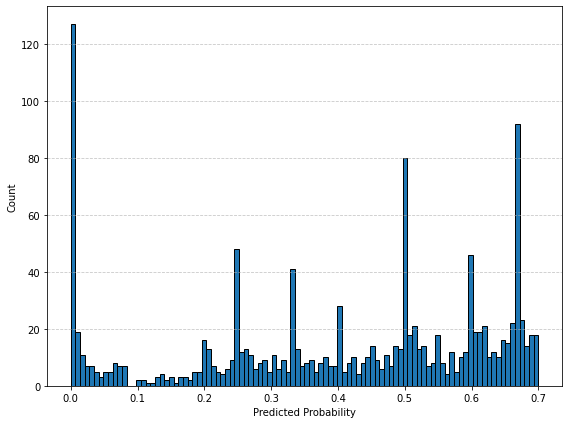

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.hist(wrong_df['pred_0'], bins=100, edgecolor='black')  # 你可以调整 bins 的数量
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Repeat 10

In [25]:
import pandas as pd
import numpy as np
import re

pred_file =  "../../results/predictions/merged_predictions_repeat_10.csv"
preds_df = pd.read_csv(pred_file)

def parse_prediction(value):
    if not isinstance(value, str): 
        return np.nan  

    value = re.sub(r"[\[\]]", "", value) 
    value = re.sub(r",+", ",", value) 
    value = re.sub(r"\s+", " ", value) 
    try:
        values = np.array([float(x) for x in value.split()])  
        return values
    except ValueError:
        return np.nan  

preds_df["parsed_labels"] = preds_df["labels"].apply(parse_prediction)

parsed_probs_df = pd.DataFrame(preds_df["parsed_labels"].tolist(), columns=["pred_0", "pred_1", "pred_2"])

final_preds_df = pd.concat([preds_df["SMILES"], parsed_probs_df], axis=1)

merged_df=final_preds_df
merged_df

,SMILES,pred_0,pred_1,pred_2
0,N1c(nc(c(cc2C)n3)cc2C)c3C(O)=NC1=O,0.000003,9.999964e-01,7.814248e-07
1,C1([C@]([C@]2([H])[C@@](O)(C[C@H]1O)[C@]([H])(...,1.000000,1.887197e-32,3.956999e-27
2,C1(C)=C(O)[C@H](C\C(\C)=C/CC[C@H](C)\C=C\C=C(\...,1.000000,5.961600e-16,1.211715e-13
3,C(OS([O-])(=O)=O)CNC(=O)[C@@]1([H])CC[C@]([H])...,1.000000,9.732420e-16,2.227661e-13
4,[C@@]1([C@](C)(C(=O)O)[C@@]([H])(C(C)=C[C@H]2C...,1.000000,1.021501e-11,3.533026e-09
...,...,...,...,...
91215,[C@@]1([H])([C@]2(C)C[C@@]([H])(O3)[C@@]3(C)CC...,0.999999,4.113752e-08,1.349768e-06
91216,C(S[C@H]1CCN[C@@H](C(O)=O)C1)[C@@H](O)C(=O)O,0.999999,3.847306e-08,5.975843e-07
91217,[C@@H]([C@@H]1O[C@@H](OCC(NC(C(CCCCCCCCCCCC(CC...,1.000000,6.136590e-09,1.333475e-08
91218,C1CC[C@]2(C(CC[C@@](C)(C(CC=C([C@H](C)O[C@H]3O...,0.999432,1.776063e-07,5.683258e-04


In [26]:

avg_preds = merged_df.groupby("SMILES")[["pred_0", "pred_1", "pred_2"]].mean().reset_index()

avg_preds


,SMILES,pred_0,pred_1,pred_2
0,Br[C@H]1C(C)(O[C@@]([C@]2([H])CC=C(C)CC2)(C)[C...,0.842742,1.135709e-01,4.368730e-02
1,Br[C@H]1C(O[C@@]([C@@H]2O[C@H](CC[C@H]([C@]3(O...,1.000000,7.330803e-08,9.477800e-08
2,Br\C=C\C#CCCCC[C@@H]1O[C@H]1C#CC#CCCCC(=O)OC,1.000000,3.218175e-14,3.475861e-13
3,Br\C=C\C#CCCCC[C@H](O)[C@@H](Br)C#CC#CCCCC(=O)OC,1.000000,1.987346e-14,1.168814e-13
4,Br\C=C\C#CCCCC[C@H](O)[C@H](Br)C#CC#CCCCC(=O)OC,1.000000,1.433837e-13,3.728338e-12
...,...,...,...,...
11397,o1c(nc(ccc(c2)O)c23)c3c4c(c(c(cc5)[nH]c6)c6C[C...,0.998940,8.260626e-04,2.336432e-04
11398,o1cc(c(C[C@@]2([C@@](C)([C@H](C\C=C(\C)/C3)OC(...,0.875246,2.761475e-06,1.247511e-01
11399,s1c(c(c(ncc2)c(c2c3c(cccc3)N4)c45)nc1)c5CCNC(=...,0.874919,1.138955e-01,1.118521e-02
11400,s1c(c(ssc(c(c(c(OC)c2OC)SC)CCN(C)C)c12)c(OC)c(...,0.999997,1.586983e-08,3.220290e-06


In [27]:

avg_preds["pred_label"] = avg_preds[["pred_0", "pred_1", "pred_2"]].idxmax(axis=1).str.extract(r"(\d)").astype(int)

true_data = pd.read_csv("../../data/processed/data_cmnpd_after2000.csv")

merged = pd.merge(avg_preds, true_data[["SMILES", "labels"]], on="SMILES", how="inner")
merged["mismatch"] = merged["pred_label"] != merged["labels"]
wrong=merged[merged['mismatch']==True]
wrong

,SMILES,pred_0,pred_1,pred_2,pred_label,labels,mismatch
99,C(/C(/C)=C/[C@@H](C)C[C@@H](C)CCC)=C(/C(=C(C)C...,0.436973,0.001249,5.617779e-01,2,0,True
129,C(/C(=O)C[C@@H]1C)(\C=C2[C@@]1([H])CC[C@@H]2C)...,0.372911,0.008681,6.184083e-01,2,0,True
131,C(/C(=O)N\C=C\C(\C)=C\[C@@H](C)[C@H](OC(=O)\C=...,0.380433,0.619567,1.100179e-07,1,0,True
132,C(/C(=O)N\C=C\C(\C)=C\[C@@H](C)[C@H](OC(=O)\C=...,0.396977,0.600309,2.714607e-03,1,0,True
154,C(/C(OCC=C1)C1=C2O)(\C2=O)=C\CCO,0.000899,0.006161,9.929395e-01,2,0,True
...,...,...,...,...,...,...,...
11311,n1([C@H](O[C@H](CO)[C@H]2O[C@@H](O[C@@H]3CO)[C...,0.343351,0.297628,3.590215e-01,2,0,True
11327,n1(nccc1C(=O)O)C,0.174529,0.775263,5.020833e-02,1,0,True
11332,n1c(Br)c(Br)[nH]c1Br,0.290303,0.697183,1.251389e-02,1,0,True
11357,n1c(c(C(O)=NC2=O)n([C@@H](C[C@@H]3O)O[C@@H]3CO...,0.291669,0.581478,1.268530e-01,1,0,True


In [28]:
wrong_df=avg_preds[avg_preds['pred_0']<0.9]
wrong_df

,SMILES,pred_0,pred_1,pred_2,pred_label
0,Br[C@H]1C(C)(O[C@@]([C@]2([H])CC=C(C)CC2)(C)[C...,0.842742,0.113571,4.368730e-02,0
16,Brc1c(c(cc(Br)c1OC)O)Oc(ccc2Br)c(Br)c2,0.898191,0.097143,4.665503e-03,0
21,Brc1cc(c(cc1)Oc(c(c(c(Br)c2)Br)O)c2Br)Br,0.870477,0.129522,4.445510e-07,0
64,C(#CC#CCCCCCC(OC(=O)C)CC)\C=C\C=C/Cl,0.809256,0.185516,5.227035e-03,0
72,C(#CC#C\C=C/CCCC[C@@H](OC(=O)C)C)\C=C\C=C/Cl,0.828964,0.165840,5.196362e-03,0
...,...,...,...,...,...
11376,n1c(cn(Cc2ccc(cc2)OC)c1N)Cc(cc3)cc(OC)c3OC,0.317624,0.389484,2.928921e-01,1
11386,n1c2c(n([C@H](O[C@@H]3CN(C)N(C)C[C@@H]4[C@@H](...,0.887229,0.000699,1.120718e-01,0
11395,o1c(CC(CC(CCC)CC)C)cc(CC)c1CC(=O)O,0.829625,0.166349,4.026911e-03,0
11398,o1cc(c(C[C@@]2([C@@](C)([C@H](C\C=C(\C)/C3)OC(...,0.875246,0.000003,1.247511e-01,0


In [14]:
wrong_df=avg_preds[avg_preds['pred_0']<0.7]
wrong_df

,SMILES,pred_0,pred_1,pred_2,pred_label
84,C(/Br)=C(\OC)/C(=C)CC(OC(CCCCCCCCCCC\C(\Cl)=C/...,0.599780,0.400220,1.067378e-07,0
85,C(/Br)=C(\OC)/C(=C)CC(OC(CCCCCCCCC\C=C\C(\Cl)=...,0.597578,0.402373,4.938635e-05,0
99,C(/C(/C)=C/[C@@H](C)C[C@@H](C)CCC)=C(/C(=C(C)C...,0.436973,0.001249,5.617779e-01,2
129,C(/C(=O)C[C@@H]1C)(\C=C2[C@@]1([H])CC[C@@H]2C)...,0.372911,0.008681,6.184083e-01,2
130,C(/C(=O)NC(C(C)C)C(=O)N[C@@H](C(C)O)C(=O)NC(C(...,0.508450,0.491366,1.836055e-04,0
...,...,...,...,...,...
11332,n1c(Br)c(Br)[nH]c1Br,0.290303,0.697183,1.251389e-02,1
11343,n1c(N)c(c(n([C@@H]([C@H](O)[C@H]2O)O[C@@H]2CSS...,0.610070,0.255844,1.340867e-01,0
11355,n1c([nH]cn2)c2c(NC(=O)[C@H](C)CC)nc1,0.586647,0.405103,8.249114e-03,0
11357,n1c(c(C(O)=NC2=O)n([C@@H](C[C@@H]3O)O[C@@H]3CO...,0.291669,0.581478,1.268530e-01,1


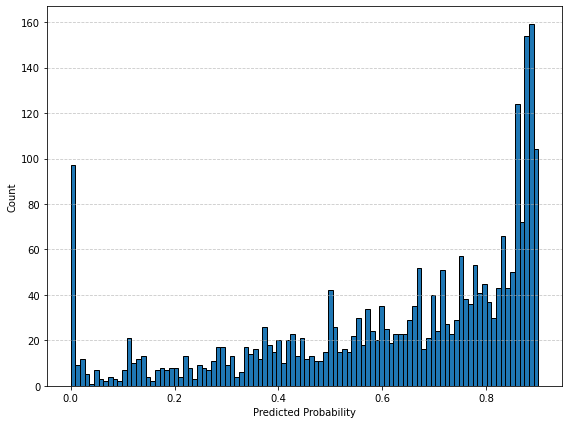

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.hist(wrong_df['pred_0'], bins=100, edgecolor='black') 
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

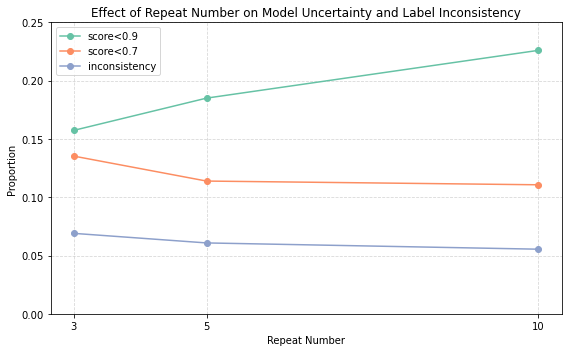

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("Set2")

repeats = [3, 5, 10]

score_09 = [1781/11317, 2109/11398, 2577/11402]
score_07 = [1531/11317, 1298/11398, 1262/11402]
inconsistency = [781/11317, 693/11398, 632/11402]

plt.figure(figsize=(8, 5))
plt.plot(repeats, score_09, label="score<0.9", marker="o", color=palette[0])
plt.plot(repeats, score_07, label="score<0.7", marker="o", color=palette[1])
plt.plot(repeats, inconsistency, label="inconsistency", marker="o", color=palette[2])

plt.title("Effect of Repeat Number on Model Uncertainty and Label Inconsistency")
plt.xlabel("Repeat Number")
plt.ylabel("Proportion")
plt.xticks(repeats)
plt.ylim(0, 0.25)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig('../../results/figures/cross_validation_repeat.svg',format='svg')
plt.show()

## Cleaning

In [31]:
import pandas as pd

full_data_path = "../../data/processed/data_cmnpd_after2000.csv"

full_df = pd.read_csv(full_data_path)

filtered_df = full_df[~full_df["SMILES"].isin(wrong_df["SMILES"])]

filtered_df.to_csv("../../data/processed/data_cmnpd_after2000_cleaned.csv", index=False)
